In [50]:
#Importar librerias
import pandas as pd #trabajar con tablas de datos
import numpy as np #operaciones matematicas y numericas
from matplotlib import pyplot as plt #generar visualizaciones (graficos)
import scipy.stats as st #pruebas de hipotesis
from scipy.stats import ttest_ind
from datetime import datetime

In [51]:
#Cargar datos
df_games=pd.read_csv('/datasets/games.csv')

In [52]:
#Diagnostico Inicial de datos
df_games.info()
df_games.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
4460,SpongeBob's Atlantis SquarePantis,PS2,2007.0,Action,0.36,0.01,0.00,0.06,NaN,tbd,E
15476,War Leaders: Clash of Nations,PC,2009.0,Strategy,0.00,0.02,0.00,0.00,NaN,6.4,T
15802,GA - Geijutsuka Art Design Class: Slapstick Wo...,PSP,2010.0,Adventure,0.00,0.00,0.02,0.00,NaN,NaN,NaN
4470,Yu-Gi-Oh! 5D's Tag Force 4,PSP,2009.0,Strategy,0.19,0.07,0.12,0.05,NaN,NaN,NaN
6337,NASCAR 2011: The Game,PS3,2011.0,Racing,0.25,0.00,0.00,0.02,62.0,3.7,E
4817,Marvel: Ultimate Alliance,Wii,2006.0,Role-Playing,0.36,0.00,0.00,0.03,73.0,7.3,T
5986,Zoo Tycoon 2 DS,DS,2008.0,Strategy,0.24,0.03,0.00,0.02,60.0,5.4,E
444,Rhythm Heaven,DS,2008.0,Misc,0.55,0.50,1.93,0.13,83.0,9,E
10131,AirForce Delta Strike,PS2,2004.0,Simulation,0.05,0.04,0.00,0.01,66.0,7,T
14625,Harley-Davidson: Road Trip,Wii,2010.0,Racing,0.03,0.00,0.00,0.00,NaN,tbd,E


In [53]:
#Cambiar nombres de columnas a 'snake_case'
df_games.columns = df_games.columns.str.lower()

In [54]:
#Estandarizar en la columna 'name' que los nombres de los juegos esten en mayusculas, que no existas espacios no deseados y quitar los signos de puntuacion
df_games['name']=df_games['name'].str.upper() #Poner en mayuscula
df_games['name']=df_games['name'].str.strip() #Quitar espacios no deseados
df_games['name']=df_games['name'].str.replace(":","").str.replace(";","").str.replace(",","").str.replace(".","") #Quitar signos de puntuacion
df_games['name'].value_counts().sort_values(ascending= False)

NEED FOR SPEED MOST WANTED            12
LEGO MARVEL SUPER HEROES               9
MADDEN NFL 07                          9
RATATOUILLE                            9
FIFA 14                                9
                                      ..
WARIOWARE TOUCHED!                     1
AGE OF CONAN RISE OF THE GODSLAYER     1
HOLLY HOBBIE & FRIENDS                 1
SPECTRAL FORCE 3                       1
WE SKI & SNOWBOARD                     1
Name: name, Length: 11546, dtype: int64

In [55]:
#Verificar si hay valores perdidos
df_games[df_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [56]:
#Reemplazar nombres perdidos por "NOT DEFINED"
df_games['name']=df_games['name'].fillna('NOT DEFINED')

In [57]:
#Agrupar de la columna Platform las opciones existentes en tipologias de forma que se cree la columna platform_group validando si son de la misma empresa o marca.
def fun_plataforma (x):
    if x in ['3DS', 'DS', 'GB', 'GBA', 'GC', 'N64', 'NES', 'SNES', 'Wii', 'Wiiu']:
        return "Nintendo"
    elif x in ['PC', 'PCFX']:
        return "PC"
    elif x in ['PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV']:
        return "PlayStation"
    elif x in ['X360', 'XB', 'Xone']:
        return "XBox"
    else:
        return "Other"

In [58]:
df_games["platform_group"]= df_games["platform"].apply(fun_plataforma)
df_games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group
16385,KAMAITACHI NO YORU 2 TOKUBETSU HEN,PSP,2006.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,PlayStation
11573,BOXING FEVER,GBA,2001.0,Sports,0.06,0.02,0.00,0.00,76.0,tbd,E,Nintendo
10426,KENKA BANCHO BROS TOKYO BATTLE ROYALE,PSP,2012.0,Action,0.00,0.00,0.10,0.00,NaN,NaN,NaN,PlayStation
12988,COUNTDOWN THE GAME,Wii,2009.0,Puzzle,0.00,0.05,0.00,0.00,NaN,NaN,NaN,Nintendo
6164,THE URBZ SIMS IN THE CITY (US WEEKLY SALES),DS,2004.0,Simulation,0.26,0.00,0.00,0.02,NaN,NaN,NaN,Nintendo
13002,ANIMAL PLANET VET COLLECTION,DS,2010.0,Simulation,0.05,0.00,0.00,0.00,NaN,tbd,E,Nintendo
4747,ROCKSMITH 2014,XOne,2014.0,Misc,0.29,0.08,0.00,0.04,NaN,NaN,NaN,Other
3541,TOP SPIN 3,PS3,2008.0,Action,0.08,0.36,0.00,0.12,75.0,7.5,E,PlayStation
2119,DISNEY INFINITY,PS3,2013.0,Action,0.49,0.32,0.00,0.16,75.0,5.9,E10+,PlayStation
6910,FIFA WORLD CUP GERMANY 2006,XB,2006.0,Sports,0.18,0.05,0.00,0.01,77.0,8.4,E,XBox


In [59]:
#Al agrupar por marca las plaformas es mas facil de visualizar la informacion y de explicar 
df_games['platform_group'].value_counts()

PlayStation    6720
Nintendo       6123
XBox           2086
PC              975
Other           811
Name: platform_group, dtype: int64

In [60]:
#Quitar valores perdidos de la columna 'year_of_release'
df_games['year_of_release'].isna().sum()

269

In [61]:
df_games=df_games.dropna(subset=['year_of_release'])

In [62]:
#Transformar la columna 'year_of_release' a entero
df_games.loc[:, 'year_of_release'] = df_games['year_of_release'].astype(int)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16446 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
 11  platform_group   16446 non-null  object 
dtypes: float64(5), int64(1), object(6)
memory usage: 1.6+ MB


In [63]:
#Visualizar los valores perdidos en la columna 'genre'
df_games[df_games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group
659,NOT DEFINED,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,Other
14244,NOT DEFINED,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,Other


In [64]:
#Reemplazar nombres perdidos por "NOT DEFINED"
df_games.loc[:, 'genre'] = df_games['genre'].fillna('NOT DEFINED')

In [65]:
#Sustituir 'tbd' de la columna 'user_score' por un valor perdido númerico 'NaN'
df_games.loc[df_games['user_score']=='tbd', 'user_score'] =np.nan

In [66]:
#Transformar la columna 'user_score' a float
df_games.loc[:, 'user_score'] = df_games['user_score'].astype(float)

In [67]:
#Estandarizar los valores a 100 (multiplicar por 10)
df_games['user_score']=df_games['user_score']*10
df_games['user_score'].describe().round(1)

count    7463.0
mean       71.3
std        15.0
min         0.0
25%        64.0
50%        75.0
75%        82.0
max        97.0
Name: user_score, dtype: float64

-Los valores ausentes se colocaron como no definidos para no alterar la informacion de los datos en general.
-Estos datos pueden que esten ausentes por que no tuvo una calificacion por los usuarios, por que no se le asigno ningun genero al juego o por que el nombre no se determino.
-En la columna user_score donde hay datos tbd se sustituyo con un nan de valor perdido numerico para poder tener una analisis estadistico de esa columna    

In [68]:
#Crear una nueva columna fun_rating para que sea mas explicativa la calificacion puesto que no todo el mundo conoce las siglas que se manejan.
def fun_rating (x):
    if x == 'E' or x == 'K-A':
        return 'Everyone'
    elif x == 'T':
        return 'Teens'
    elif x == 'M' or x == 'AO':
        return 'Mature'
    elif x == 'E10+':
        return 'Everyone 10y+'
    elif x == 'EC':
        return 'Early Childhood'
    else:
        return 'Pending'

In [69]:
df_games['rating_sem']= df_games['rating'].apply(fun_rating)
df_games.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,rating_sem
3776,BURNOUT REVENGE,XB,2005,Racing,0.32,0.19,0.00,0.01,89.0,84.0,E10+,XBox,Everyone 10y+
5562,STYLE LAB JEWELRY DESIGN,DS,2009,Simulation,0.30,0.00,0.00,0.02,NaN,NaN,E,Nintendo,Everyone
6403,BOOGIE,DS,2007,Misc,0.24,0.00,0.00,0.02,58.0,NaN,E10+,Nintendo,Everyone 10y+
6123,DEATHSMILES,X360,2009,Shooter,0.15,0.06,0.05,0.02,76.0,84.0,T,XBox,Teens
12774,WORLD CHAMPIONSHIP ATHLETICS,Wii,2009,Sports,0.04,0.01,0.00,0.00,NaN,NaN,E,Nintendo,Everyone
9566,SHINING WIND,PS2,2007,Role-Playing,0.00,0.00,0.13,0.00,NaN,NaN,NaN,PlayStation,Pending
2747,THE LORD OF THE RINGS CONQUEST,PS3,2009,Action,0.38,0.25,0.00,0.11,54.0,71.0,T,PlayStation,Teens
12327,KAMEN RIDER DRAGON KNIGHT,Wii,2009,Fighting,0.06,0.00,0.00,0.00,NaN,NaN,T,Nintendo,Teens
1288,LEGO STAR WARS III THE CLONE WARS,X360,2011,Action,0.84,0.51,0.00,0.13,75.0,78.0,E10+,XBox,Everyone 10y+
3029,NFL STREET,XB,2004,Sports,0.49,0.15,0.00,0.02,81.0,88.0,E,XBox,Everyone


In [70]:
df_games['rating_sem'].value_counts()

Pending            6679
Everyone           3924
Teens              2905
Mature             1537
Everyone 10y+      1393
Early Childhood       8
Name: rating_sem, dtype: int64

In [71]:
#Crear una columna con el total de ventas
df_games['total_sales']=df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [72]:
#Tratamiento de duplicados
df_games.duplicated().sum()

0

In [73]:
#Validar duplicado en combinaciones de columnas como juego y plataforma (no obvios)
df_games[['name', 'platform']].duplicated().sum()

4

In [74]:
df_games[df_games[['name', 'platform', 'year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,platform_group,rating_sem,total_sales
14244,NOT DEFINED,GEN,1993,NOT DEFINED,0.0,0.00,0.03,0.0,NaN,NaN,NaN,Other,Pending,0.03
16230,MADDEN NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.0,83.0,55.0,E,PlayStation,Everyone,0.01


In [75]:
#Eliminar duplicados
df_games=df_games.drop_duplicates(subset= ['name', 'platform', 'year_of_release'])

In [76]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           9767 non-null   object 
 11  platform_group   16444 non-null  object 
 12  rating_sem       16444 non-null  object 
 13  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(6)
memory usage: 1.9+ MB


In [77]:
#¿Cuantos juegos fueron lanzados por año?
juegos_por_año = df_games.groupby('year_of_release')["name"].count()
juegos_por_año

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      61
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

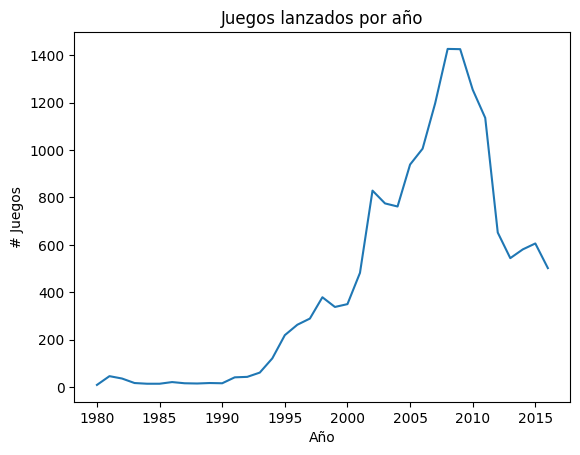

In [78]:
#Visualizar datos de manera grafica
juegos_por_año.plot(xlabel='Año',
ylabel='# Juegos',
title ='Juegos lanzados por año')
plt.show()

-De la grafica podemos analizar que durante los primeros años no hay tantos lanzamientos de videojuegos por eso se ve un valor entre 0 y 200 ya apartir de 1994 cuando aparece PlayStation ya los lanzamientos de videojuegos empezo a incrementar y a causa de la crisis del año 2008 se empieza a ver una caida significativa en los lanzamientos y como afecto la economia a nivel mundial produjo una incertidumbre economica que afecto la produccion de los videojuegos.

In [79]:
#Ventas por plataforma
ventas_por_plataforma = df_games.pivot_table(
    index='year_of_release',
    columns='platform_group', 
    values='total_sales', 
    aggfunc='sum',
    fill_value= 0)
ventas_por_plataforma

platform_group,Nintendo,Other,PC,PlayStation,XBox
year_of_release,,,,,
1980,0.00,11.38,0.00,0.00,0.00
1981,0.00,35.68,0.00,0.00,0.00
1982,0.00,28.88,0.00,0.00,0.00
1983,10.96,5.84,0.00,0.00,0.00
1984,50.08,0.27,0.00,0.00,0.00
1985,53.46,0.45,0.04,0.00,0.00
1986,36.41,0.67,0.00,0.00,0.00
1987,19.76,1.94,0.00,0.00,0.00
1988,46.44,0.74,0.03,0.00,0.00


In [80]:
#¿Cuanto tardan las nuevas plataformas en aparecer?
df_games.groupby('platform')['year_of_release'].min().sort_values()

platform
2600    1980
NES     1983
DS      1985
PC      1985
GB      1988
SNES    1990
GEN     1990
GG      1992
SCD     1993
NG      1993
SAT     1994
PS      1994
3DO     1994
TG16    1995
PCFX    1996
N64     1996
DC      1998
WS      1999
GBA     2000
XB      2000
PS2     2000
GC      2001
PSP     2004
X360    2005
PS3     2006
Wii     2006
3DS     2011
PSV     2011
WiiU    2012
PS4     2013
XOne    2013
Name: year_of_release, dtype: int64

In [81]:
#¿Cuanto tardan las antiguas plataformas en desaparecer?
df_games.groupby('platform')['year_of_release'].max().sort_values()

platform
2600    1989
GG      1992
SCD     1994
GEN     1994
NES     1994
3DO     1995
TG16    1995
NG      1996
PCFX    1996
SNES    1999
SAT     1999
WS      2001
GB      2001
N64     2002
PS      2003
GC      2007
GBA     2007
XB      2008
DC      2008
PS2     2011
DS      2013
PSP     2015
PS3     2016
PS4     2016
PSV     2016
3DS     2016
Wii     2016
WiiU    2016
X360    2016
PC      2016
XOne    2016
Name: year_of_release, dtype: int64

In [82]:
#Duracion de las plataformas en el mercado
platform_life = df_games.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_life['duration'] = platform_life['max'] - platform_life['min']
platform_life.sort_values('duration', ascending=False)

,min,max,duration
platform,,,
PC,1985,2016,31
DS,1985,2013,28
GB,1988,2001,13
X360,2005,2016,11
PSP,2004,2015,11
PS2,2000,2011,11
NES,1983,1994,11
DC,1998,2008,10
Wii,2006,2016,10


En conclusion podemos indicar que las plataformas aparecen en un rango de 5 a 7 años y las antiguas desaparecen entre 2 a 4 años con la salida de la nueva generacion.

In [83]:
#Informacion relevante para construir modelo para 2017
df_games=df_games.query('year_of_release>=2010')

Para poder construir un modelo para 2017 es necesario contar con la informacion reciente y representantiva de la industria, por eso seleccione desde el año 2010 al 2016 que incluye suficientes datos actualizados, refleja las plataformas activas del momento y permite capturar tendencias útiles.

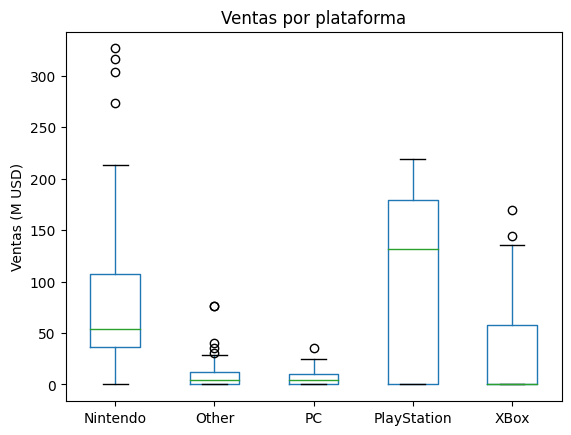

In [84]:
#¿Que plataformas son lideres en Ventas?
ventas_por_plataforma.plot(
    kind = 'box',
    xlabel='platform_group',
    ylabel='Ventas (M USD)',
    title='Ventas por plataforma'
)
plt.show()

De acuerdo con el grafico anterior las plataformas lideres son PlayStation, Nintendo, y Xbox agrupadas por la marca y las que se reducen son PC y otras como TG16, 3DO, SAT.

°Hipotesis nula: Ventas promedio de Nintendo son iguales a las Ventas promedio de PlayStation
°Hipotesis alternativa:Ventas promedio de Nintendo no son iguales a las Ventas promedio de PlayStation

In [85]:
#Extraer las muestras con las que se va a trabajar
muestra_NT=ventas_por_plataforma['Nintendo']
muestra_PS=ventas_por_plataforma['PlayStation']
#Correr la prueba de hipotesis
st.ttest_ind(
    muestra_NT,
    muestra_PS,
    alternative= 'two-sided',
    equal_var=False
).pvalue


0.8293664245277865

Con base en la prueba estadística (valor p = 0.829), no se encontró evidencia significativa para afirmar que existe una diferencia en las medias de ventas entre las plataformas Nintendo y PlayStation. Por lo tanto, podemos considerar que su rendimiento promedio es estadísticamente similar.

Al analizar la media de las métricas en cada grupo de plataformas, se observa que PlayStation y Nintendo son los líderes en ventas promedio, lo que puede atribuirse a su fuerte presencia en el mercado, seguido por Xbox en un promedio de ventas moderado pero aun es compentitivo y ya finaliza PC y otras plataformas con un promedio menor.

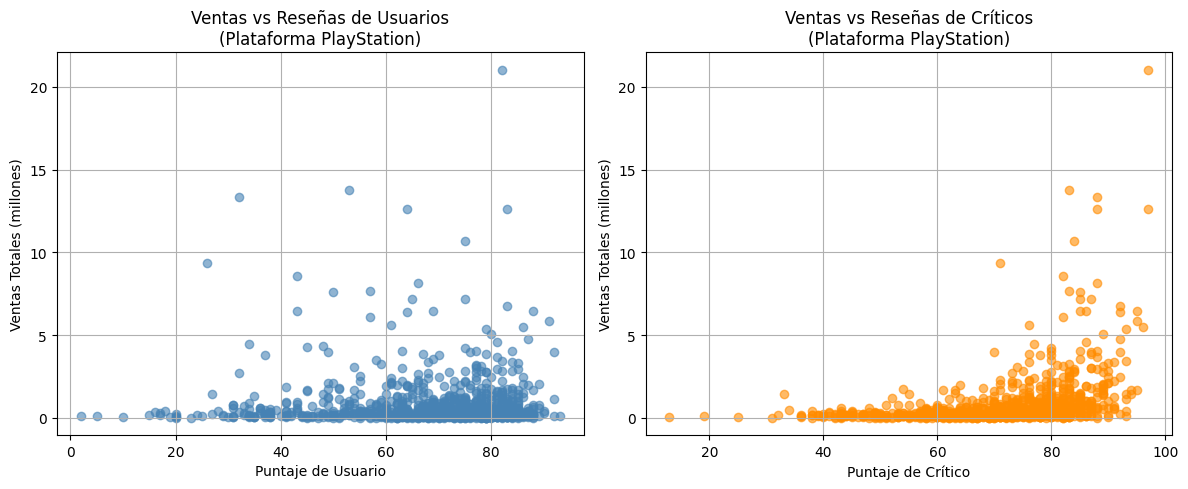

Correlación entre reseñas de usuarios y ventas: 0.01
Correlación entre reseñas de críticos y ventas: 0.38


In [86]:
# Filtrar todos los juegos de plataformas que contienen 'PlayStation'
juegos = df_games[df_games['platform_group'].str.contains('PlayStation', case=False,)]
plt.figure(figsize=(12, 5))
# Gráfico 1: Reseñas de usuarios vs ventas
plt.subplot(1, 2, 1)
plt.scatter(juegos['user_score'], juegos['total_sales'], alpha=0.6, color='steelblue')
plt.title('Ventas vs Reseñas de Usuarios\n(Plataforma PlayStation)')
plt.xlabel('Puntaje de Usuario')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)
# Gráfico 2: Reseñas de críticos vs ventas
plt.subplot(1, 2, 2)
plt.scatter(juegos['critic_score'], juegos['total_sales'], alpha=0.6, color='darkorange')
plt.title('Ventas vs Reseñas de Críticos\n(Plataforma PlayStation)')
plt.xlabel('Puntaje de Crítico')
plt.ylabel('Ventas Totales (millones)')
plt.grid(True)

plt.tight_layout()
plt.show()
cor_user = juegos['user_score'].corr(juegos['total_sales'])
cor_critic = juegos['critic_score'].corr(juegos['total_sales'])

print(f"Correlación entre reseñas de usuarios y ventas: {cor_user:.2f}")
print(f"Correlación entre reseñas de críticos y ventas: {cor_critic:.2f}")

De acuerdo a los resultados obtenidos las reseñas de los usuarios tienen una correlacion casi nula con las ventas y posiblemente las reseñas de usuarios pueden estar sesgadas o ser emocionales y las ventas pueden depender más de marketing, franquicias o lanzamientos exclusivos. 
De acuerdo con la correlacion de los criticos vs ventas es positiva y esto se presenta por que  los juegos mejor valorados por críticos tienden a vender más y ayuda con el exito de ventas de un juego.

In [87]:
# Encontrar juegos lanzados en más de una plataforma
multi_platform_games = df_games.groupby('name')['platform_group'].nunique()
multi_platform_games = multi_platform_games[multi_platform_games > 1].index
# Filtrar solo esos juegos del DataFrame
df_multi = df_games[df_games['name'].isin(multi_platform_games)]
# Calcular ventas promedio por juego y plataforma
ventas_comparadas = df_multi.groupby(['name', 'platform_group'])['total_sales'].mean().reset_index()
# Calcular correlaciones por plataforma
for platform in df_multi['platform_group'].unique():
    subset = df_multi[df_multi['platform_group'] == platform]
    cor_user = subset['user_score'].corr(subset['total_sales'])
    cor_critic = subset['critic_score'].corr(subset['total_sales'])
    print(f"{platform}: corr usuario = {cor_user:.2f}, corr crítico = {cor_critic:.2f}")

PlayStation: corr usuario = 0.04, corr crítico = 0.40
XBox: corr usuario = 0.04, corr crítico = 0.39
Nintendo: corr usuario = 0.13, corr crítico = 0.21
Other: corr usuario = -0.07, corr crítico = 0.39
PC: corr usuario = 0.03, corr crítico = 0.32


En todas las plataformas, la correlación entre reseñas de críticos y ventas es significativamente más alta que la de los usuarios, esto sugiere que los consumidores podrían estar más influenciados por los análisis profesionales.
Las reseñas de críticos muestran una correlación más fuerte con las ventas en todas las plataformas analizadas, especialmente en PlayStation, Xbox y PC. Por otro lado, las reseñas de usuarios tienen una relación débil o nula con las ventas, lo que sugiere que las decisiones de compra están más influenciadas por otros factores como el marketing, las franquicias y la exclusividad. Nintendo es la única plataforma donde las valoraciones de usuarios tienen una correlación levemente más alta, aunque sigue siendo baja. En general, los análisis profesionales parecen ser un mejor predictor del rendimiento comercial que las opiniones de los jugadores.

In [88]:
# Agrupar por género y calcular cantidad de juegos y ventas totales/promedio
generos = df_games.groupby('genre').agg(
    conteo_juegos=('name', 'count'),
    ventas_totales=('total_sales', 'sum'),
    ventas_promedio=('total_sales', 'mean')
).sort_values(by='ventas_totales', ascending=False)

print(generos)

              conteo_juegos  ventas_totales  ventas_promedio
genre                                                       
Action                 1495          673.09         0.450227
Shooter                 410          479.74         1.170098
Sports                  574          328.38         0.572091
Role-Playing            568          315.28         0.555070
Misc                    576          234.56         0.407222
Racing                  237          122.68         0.517637
Platform                153          119.72         0.782484
Fighting                199           81.59         0.410000
Simulation              217           71.75         0.330645
Adventure               563           61.00         0.108348
Strategy                170           35.84         0.210824
Puzzle                  114           20.60         0.180702


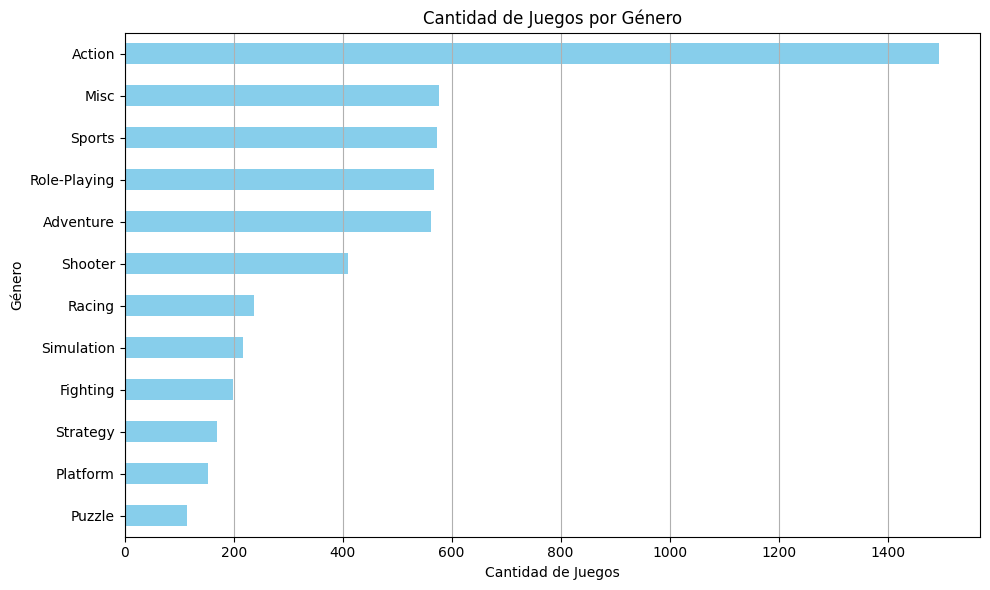

In [89]:
# Gráfico de barras: cantidad de juegos por género
plt.figure(figsize=(10, 6))
generos['conteo_juegos'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Cantidad de Juegos por Género')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Género')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

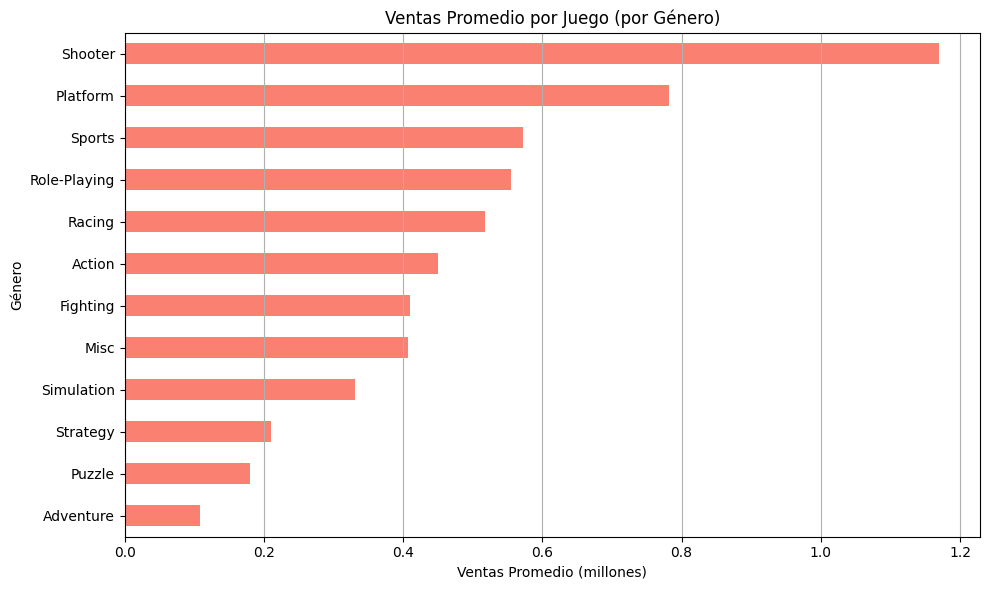

In [90]:
# Gráfico de barras: ventas promedio por género
plt.figure(figsize=(10, 6))
generos['ventas_promedio'].sort_values().plot(kind='barh', color='salmon')
plt.title('Ventas Promedio por Juego (por Género)')
plt.xlabel('Ventas Promedio (millones)')
plt.ylabel('Género')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

#¿Qué se puede decir de los géneros más rentables?
Los generos mas rentables son Shooter, platform y sports que no necesariamente son los que tiene mas juegos.
#¿Puedes generalizar acerca de los géneros con ventas altas y bajas? No podemos generalizar de acuerdo con los generos sobre las ventas altas y bajas por que pueden tratarse de caracteristicas diferentes.

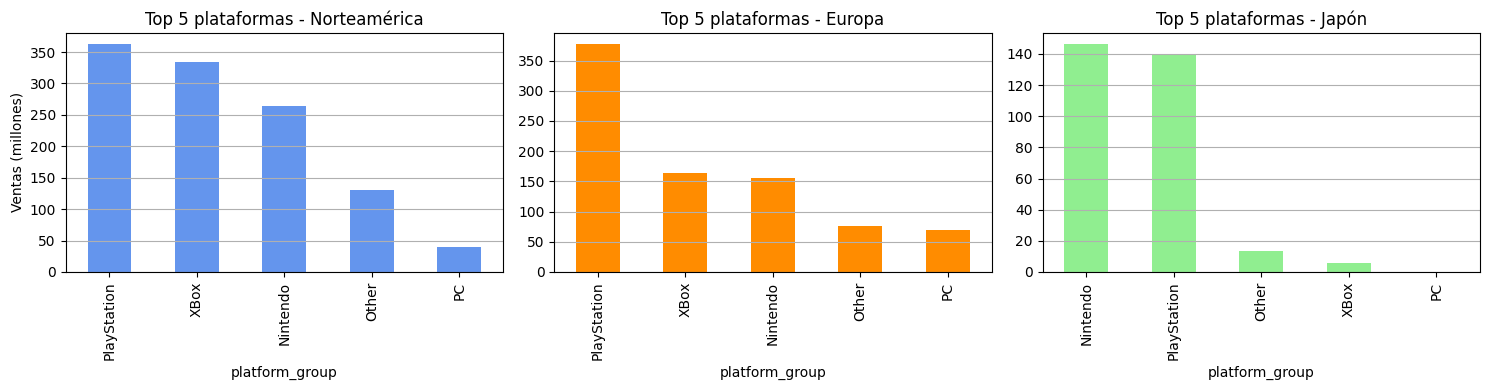

In [91]:
#Crea un perfil de usuario para cada región
# Agrupamos ventas por plataforma y región
ventas_region = df_games.groupby('platform_group')[['na_sales', 'eu_sales', 'jp_sales']].sum()
# Ordenamos para obtener las 5 principales por región
top_na = ventas_region['na_sales'].sort_values(ascending=False).head(5)
top_eu = ventas_region['eu_sales'].sort_values(ascending=False).head(5)
top_jp = ventas_region['jp_sales'].sort_values(ascending=False).head(5)
# Cuotas de mercado (%)
total_na = ventas_region['na_sales'].sum()
total_eu = ventas_region['eu_sales'].sum()
total_jp = ventas_region['jp_sales'].sum()

cuotas_na = (top_na / total_na * 100).round(2)
cuotas_eu = (top_eu / total_eu * 100).round(2)
cuotas_jp = (top_jp / total_jp * 100).round(2)
plt.figure(figsize=(15, 4))

# NA
plt.subplot(1, 3, 1)
top_na.plot(kind='bar', color='cornflowerblue')
plt.title('Top 5 plataformas - Norteamérica')
plt.ylabel('Ventas (millones)')
plt.grid(axis='y')

# EU
plt.subplot(1, 3, 2)
top_eu.plot(kind='bar', color='darkorange')
plt.title('Top 5 plataformas - Europa')
plt.grid(axis='y')

# JP
plt.subplot(1, 3, 3)
top_jp.plot(kind='bar', color='lightgreen')
plt.title('Top 5 plataformas - Japón')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


En norteamerica la plaforma principal es PlayStation y las ventas ascienden a 350 millones muy similar a Europa, sin embargo las otras plataformas como Xbox y Nintendo en norteamerica tienen mayores ventas de casi el doble que Europa, muy distinto se presenta en Japon que la plataforma lider es Nintendo con ingresos de 150 millones aproximadamente seguido de PlayStation ingresos muy por debajo a los de norteamerica y Europa.

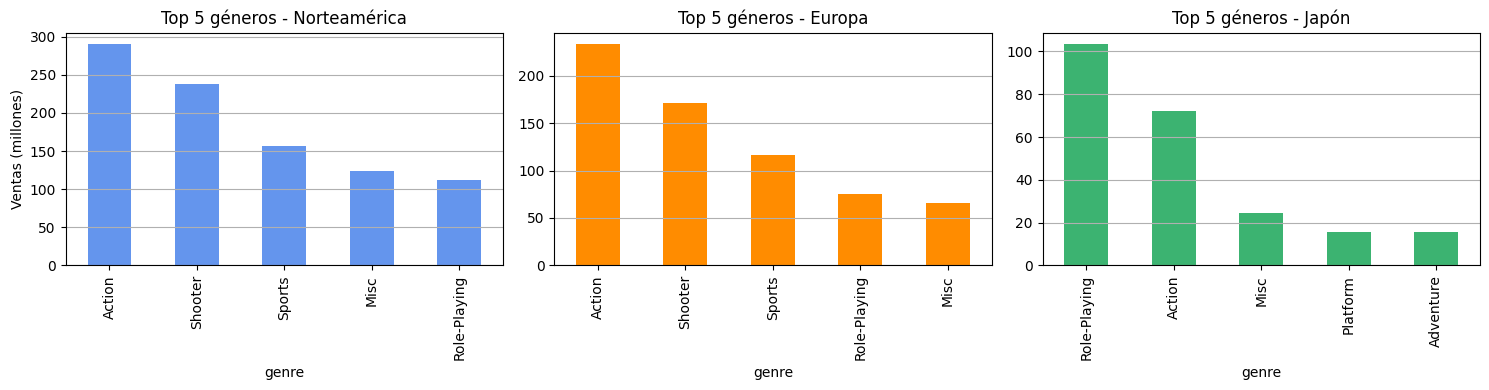

In [92]:
# Agrupar ventas por género y sumar para cada región
ventas_genero = df_games.groupby('genre')[['na_sales', 'eu_sales', 'jp_sales']].sum()

# Obtener los cinco géneros con más ventas por región
top_na_gen = ventas_genero['na_sales'].sort_values(ascending=False).head(5)
top_eu_gen = ventas_genero['eu_sales'].sort_values(ascending=False).head(5)
top_jp_gen = ventas_genero['jp_sales'].sort_values(ascending=False).head(5)
plt.figure(figsize=(15, 4))

# Norteamérica
plt.subplot(1, 3, 1)
top_na_gen.plot(kind='bar', color='cornflowerblue')
plt.title('Top 5 géneros - Norteamérica')
plt.ylabel('Ventas (millones)')
plt.grid(axis='y')

# Europa
plt.subplot(1, 3, 2)
top_eu_gen.plot(kind='bar', color='darkorange')
plt.title('Top 5 géneros - Europa')
plt.grid(axis='y')

# Japón
plt.subplot(1, 3, 3)
top_jp_gen.plot(kind='bar', color='mediumseagreen')
plt.title('Top 5 géneros - Japón')
plt.grid(axis='y')

plt.tight_layout()
plt.show()


Los generos que se repiten en Norteamerica y Europa son Action, Shooter y Sport, la diferencia de ingresos aproximadamente de 60 millones en estos 3 generos teniendo mayores ventas en norteamerica, Japon por su parte los genero Role-playing y Action tienen ventas de 3 veces menos que norteamerica.

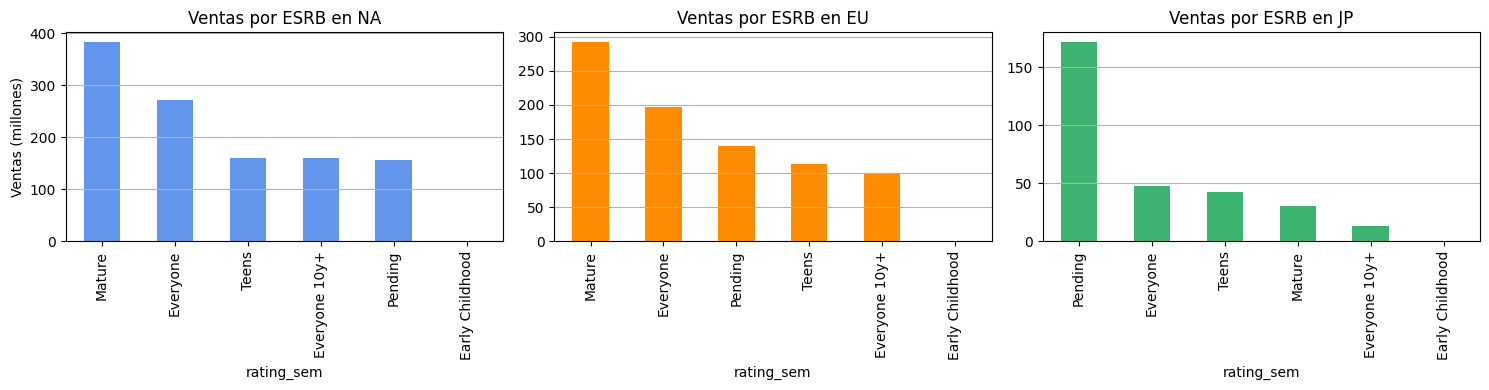

In [93]:
# Agrupar ventas por ESRB y sumar ventas en cada región
ventas_esrb = df_games.groupby('rating_sem')[['na_sales', 'eu_sales', 'jp_sales']].sum()
plt.figure(figsize=(15, 4))

# NA
plt.subplot(1, 3, 1)
ventas_esrb['na_sales'].sort_values(ascending=False).plot(kind='bar', color='cornflowerblue')
plt.title('Ventas por ESRB en NA')
plt.ylabel('Ventas (millones)')
plt.grid(axis='y')

# EU
plt.subplot(1, 3, 2)
ventas_esrb['eu_sales'].sort_values(ascending=False).plot(kind='bar', color='darkorange')
plt.title('Ventas por ESRB en EU')
plt.grid(axis='y')

# JP
plt.subplot(1, 3, 3)
ventas_esrb['jp_sales'].sort_values(ascending=False).plot(kind='bar', color='mediumseagreen')
plt.title('Ventas por ESRB en JP')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Everyone y Mature son las más vendidas en NA y EU, en NA las ventas en teens y EveryOne 10y+ son iguales asi como las que no se han clasificado. Para EU las ventas por rating de Pending, Teens y EveryOne 10y+ de 0 a 140 millones y en Japon las ventas mas altas corresponden a la clasificacion que no se tiene asignada.

In [94]:
#Prueba de Hipotesis
#Hipótesis nula (H₀): La media de las calificaciones de usuario en Xbox One y PC es la misma.
#Hipótesis alternativa (H₁): Las medias son diferentes.
# Extraer calificaciones de usuarios para cada plataforma
xbox = df_games[df_games['platform'] == 'XOne']['user_score'].dropna()
pc = df_games[df_games['platform'] == 'PC']['user_score'].dropna()
# Ejecutar prueba t de dos muestras independientes (Welch)
t_stat, p_value = st.ttest_ind(xbox, pc, equal_var=False)
# Mostrar resultados
print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')

Estadístico t: 0.024879518331065657
Valor p: 0.9801634129117981


Con un valor p de 0.9802, no se encontró evidencia estadísticamente significativa para afirmar que exista una diferencia entre las calificaciones promedio de usuarios entre Xbox One y PC.
Las calificaciones son estadísticamente similares en ambas plataformas.

In [95]:
#Prueba de Hipotesis
#Hipótesis nula (H₀): Las calificaciones promedio de los géneros Acción y Deportes son iguales
#Hipótesis alternativa (H₁): Las calificaciones promedio de los géneros Acción y Deportes son diferentes.
alpha=0.05
# Filtrar calificaciones para cada genero
accion = df_games[df_games['genre'] == 'Action']['user_score'].dropna()
deportes = df_games[df_games['genre'] == 'Sports']['user_score'].dropna()
# Prueba t de Welch (varianzas distintas)
t_stat, p_value = st.ttest_ind(accion, deportes, equal_var=False)
# Mostrar resultados
print(f'Estadístico t: {t_stat}')
print(f'Valor p: {p_value}')

Estadístico t: 8.221043616474542
Valor p: 1.8577558919385787e-15


Con un valor p de 1.86 × 10⁻¹⁵, que es mucho menor que el nivel de significancia de 0.05, se rechaza la hipótesis nula.
Por lo tanto, se concluye que existe una diferencia estadísticamente significativa entre las calificaciones promedio de los géneros Acción y Deportes.

La hipotesis nula se formula suponiendo que no hay diferencia entre los valores que se comparan es decirn entre las calificaciones de los usuarios para dos plataformas o para dos generos diferentes de video juegos.
La hipotesis alternativa se formula por ser una prueba bilateral o de dos colas y suponemos no que las plataformas o generos sean mejor calificados sino por ser distintos.

Para probar las hipotesis use prueba t de Student para muestras independientes con la corrección de Welch por si las varianzas son diferentes, y por que los datos son numericos y continuos y por que es una comparacion entre dos grupos independientes.

Como conclusiones generales del proyecto se puede indicar la importancia de visualizar primeramente el contenido de los datos para darnos una vision sobre el contenido, de igual manera es importante conocer de la industria para poder entender la informacion. 
Seguido el preparar los datos evidenciando los valores ausentes, duplicados, nombres de columnas y adicionando informacion valiosa que haga mas facil el analisis de la informacion es un punto crucial para desarrollar el proyecto satisfactoriamente.
A nivel de informacion podemos concluir que la industria de los video juegos ha tenido un auge con el pasar de los años y que de igual manera las plataformas lideres se mantienen en el tiempo con los lanzamientos de nuevas versiones, los usuarios se inclinan en ciertas partes de mundo por juegos de generos como Accion, Shooter o Sports, los ingresos mas significativos a nivel mundial se dan en Norte America.
De igual manera se evidencio que las calificaciones de usuarios no generan tanto impacto en las ventas como las calificaciones por expertos por lo cual los usuarios podrian inclinarse mas en la compra de juegos por estas calificaciones, a medida que transcurre el tiempo el tema publicitario y las nuevas tecnologias hacen que los lanzamientos sean mas exitosos comercialmente.